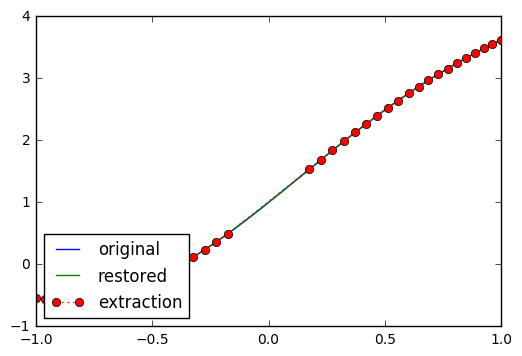

In [18]:
import numpy as np
import math
import random
from numpy.polynomial import Chebyshev as T
import matplotlib.pyplot as plt
%matplotlib inline
# init
n = 801
m = 40

x = np.zeros(n, dtype=float)
y = np.zeros(n, dtype=float)
x_t = np.zeros(m, dtype=float)
y_t = np.zeros(m, dtype=float)
T_t = np.zeros((m, m) ,dtype=float)
y_tl = np.zeros(n, dtype=float)

x = np.linspace(-1, 1, n)

# function 
y = (np.sin(2 * x) + np.exp(x))
   

i = 0
#x_t = x[:42:]
while i < m:
    point = i*20
    x_t[i] = x[point]
    y_t[i] = y[point]
    j = 0
    while j < m:
        T_t[i][j] = T.basis(j)(x_t[i])
        j = j + 1
    i = i + 1


C = np.linalg.solve(T_t, y_t)
#print ('Coefficients=', C)

i = 0
while i < n:
    j = 0
    summ = 0.0
    while j < m:
        summ = summ + C[j]*T.basis(j)(x[i])
        j = j + 1
    y_tl[i] = summ
    i = i + 1

    
#plt.plot(x, y_tl)
#plt.legend(['original', 'restored'], loc='lower left')
#plt.show()    

#extraction with weights
i = 0
extr_point_back = 0
extr_point_front = n - 1
#x_t = x[:42:]
while i < (m / 2):
    x_t[i] = x[extr_point_back]
    y_t[i] = y[extr_point_back]
    x_t[m - 1 - i] = x[extr_point_front]
    y_t[m - 1 - i] = y[extr_point_front]
    jump = math.ceil(((n-1) / m) * (1 / math.sqrt(1 + ((x[extr_point_back]) ** 2))))
    extr_point_back += jump
    extr_point_front -= jump
    j = 0
    while j < m:
        T_t[i][j] = T.basis(j)(x_t[i])
        T_t[m - 1 - i][j] = T.basis(j)(x_t[m - 1 - i])
        j = j + 1
    i = i + 1
      

C = np.linalg.solve(T_t, y_t)
#print ('Coefficients=', C)

i = 0
while i < n:
    j = 0
    summ = 0.0
    while j < m:
        summ = summ + C[j]*T.basis(j)(x[i])
        j = j + 1
    y_tl[i] = summ
    i = i + 1

    
plt.plot(x, y)    
plt.plot(x, y_tl)
plt.plot(x_t, y_t, linestyle = ':', marker = 'o')
plt.legend(['original', 'restored', 'extraction'], loc='lower left')

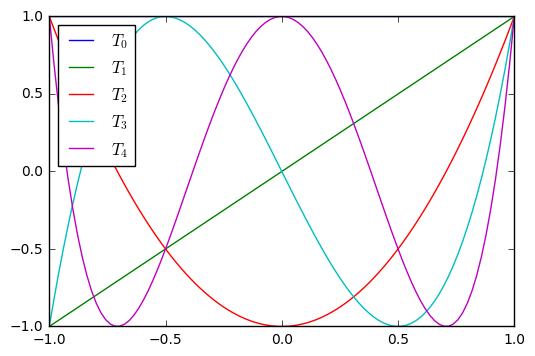

In [27]:
import numpy
import matplotlib.pyplot as plt
from numpy.polynomial import Chebyshev as T
x = numpy.linspace(-1, 1, 100)
for i in range(5): ax = plt.plot(x, T.basis(i)(x), lw=1, label="$T_%d$"%i)
plt.legend(loc="upper left")

plt.show()